In [20]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report

In [21]:
breast_cancer= load_breast_cancer()
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [22]:
df = pd.DataFrame(breast_cancer['data'],columns=breast_cancer['feature_names'])
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [23]:
df['Target'] = breast_cancer['target']

In [24]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [26]:
df['Target'].value_counts() # B- Benign(1-357), M- Malignant(0-212)

1    357
0    212
Name: Target, dtype: int64

<AxesSubplot: >

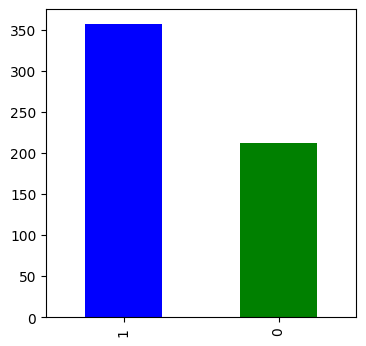

In [27]:
plt.subplots(figsize=(4,4))
df['Target'].value_counts().plot(kind='bar',color=['blue','green'])

In [28]:
# checking for missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

In [29]:
corr= df.corr().tail(1)

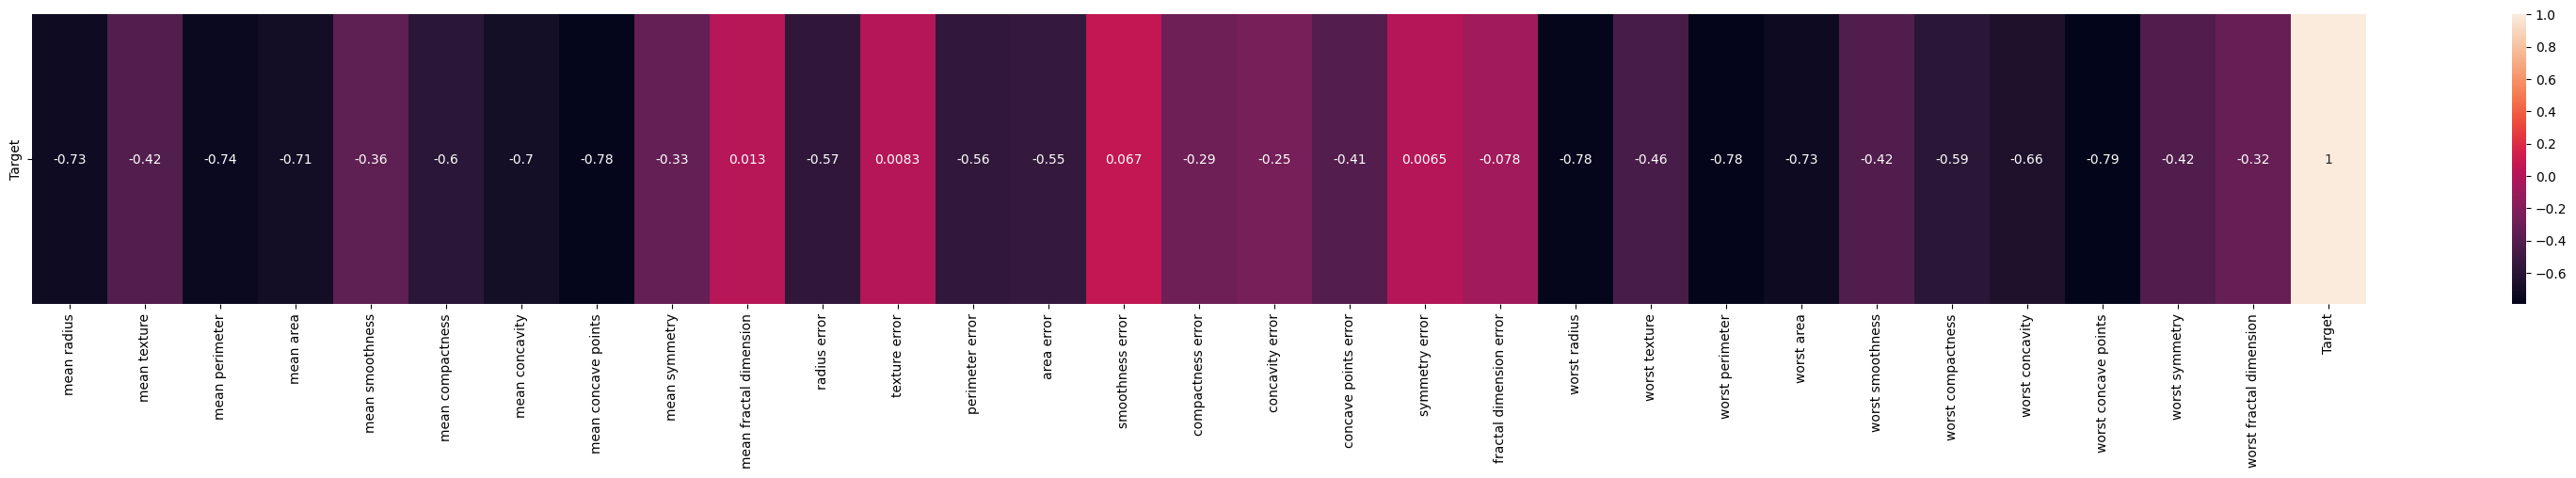

In [30]:
plt.figure(figsize=(40,4))
sns.heatmap(corr,annot=True)
plt.savefig('correlation.png')

In [31]:
# select best features which are highly correlated with target greater than 0.7 or less than -0.7
corr.T

,Target
mean radius,-0.730029
mean texture,-0.415185
mean perimeter,-0.742636
mean area,-0.708984
mean smoothness,-0.358560
mean compactness,-0.596534
mean concavity,-0.696360
mean concave points,-0.776614
mean symmetry,-0.330499
mean fractal dimension,0.012838


In [32]:
# features greater than 7 or less than -7 are selected


np.where(corr.T<-0.7)

(array([ 0,  2,  3,  7, 20, 22, 23, 27]), array([0, 0, 0, 0, 0, 0, 0, 0]))

In [33]:
new_features=corr.T.iloc[np.where(corr.T<-0.7)].index
new_features

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concave points',
       'worst radius', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')

In [34]:
new_features

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concave points',
       'worst radius', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')

In [35]:
file = open("columns.pkl","wb")
pickle.dump(new_features,file)

In [36]:
col = pickle.load(open("columns.pkl","rb"))
col

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concave points',
       'worst radius', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')

# Train Test Split

In [37]:
x = df[new_features]
y = df['Target']

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

## Logistic Regression

In [44]:
Log_reg = LogisticRegression()
Log_reg.fit(x_train,y_train)

LogisticRegression()

In [45]:
file = open('model.pkl','wb')
pickle.dump(Log_reg,file)

In [46]:
model = pickle.load(open("model.pkl","rb"))

In [47]:
# Evaluate the model


x_pred_train =Log_reg.predict(x_train)

x_pred = accuracy_score(y_train,x_pred_train)
print("accuracy_score of train data is :",x_pred)

x_pred_test =Log_reg.predict(x_test)

x_pred = accuracy_score(y_test,x_pred_test)
print("accuracy_score of test data is :",x_pred)

accuracy_score of train data is : 0.9538461538461539
accuracy_score of test data is : 0.9122807017543859


In [48]:
model_accuracy = accuracy_score(x_pred_test,y_test)
print("accuracy_score of test data is :",model_accuracy)

accuracy_score of test data is : 0.9122807017543859


In [49]:
cfs_mat = confusion_matrix(y_test,x_pred_test)
print("confusion_matrix is :\n",cfs_mat)

confusion_matrix is :
 [[41  4]
 [ 6 63]]


In [50]:
cfs_report = classification_report(y_test,x_pred_test)
print("classification_report is :\n",cfs_report)

classification_report is :
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        45
           1       0.94      0.91      0.93        69

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [51]:
cfs_report = classification_report(y_train,x_pred_train)
print("classification_report is :\n",cfs_report)

classification_report is :
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       167
           1       0.96      0.97      0.96       288

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455



## Knn Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
# Evaluate the model

x_pred_train =knn.predict(x_train)

x_pred = accuracy_score(y_train,x_pred_train)
print("accuracy_score of train data is :",x_pred)

x_pred_test =knn.predict(x_test)

x_pred = accuracy_score(y_test,x_pred_test)
print("accuracy_score of test data is :",x_pred)

accuracy_score of train data is : 0.9538461538461539
accuracy_score of test data is : 0.9122807017543859


In [ ]:
cfs_report = classification_report(y_train,x_pred_train)
print("classification_report is :\n",cfs_report)

classification_report is :
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       167
           1       0.95      0.98      0.96       288

    accuracy                           0.95       455
   macro avg       0.96      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
# Evaluate the model
x_pred_train =dt.predict(x_train)

x_pred = accuracy_score(y_train,x_pred_train)
print("accuracy_score of train data is :",x_pred)

x_pred_test =dt.predict(x_test)

x_pred = accuracy_score(y_test,x_pred_test)
print("accuracy_score of test data is :",x_pred)

accuracy_score of train data is : 1.0
accuracy_score of test data is : 0.9122807017543859


In [ ]:
alpha = dt.cost_complexity_pruning_path(x_train,y_train)
alpha

{'ccp_alphas': array([0.        , 0.00197802, 0.00217254, 0.00218925, 0.0029304 ,
        0.00323676, 0.00384615, 0.0039072 , 0.00410256, 0.00445135,
        0.0049388 , 0.01105727, 0.01425383, 0.02187702, 0.0277303 ,
        0.33578677]),
 'impurities': array([0.        , 0.00395604, 0.00830112, 0.01267963, 0.01561003,
        0.01884679, 0.02269295, 0.02660015, 0.03070272, 0.04405675,
        0.05393435, 0.06499161, 0.07924544, 0.10112246, 0.12885276,
        0.46463954])}

In [ ]:
result =alpha['ccp_alphas']
result

array([0.        , 0.00197802, 0.00217254, 0.00218925, 0.0029304 ,
       0.00323676, 0.00384615, 0.0039072 , 0.00410256, 0.00445135,
       0.0049388 , 0.01105727, 0.01425383, 0.02187702, 0.0277303 ,
       0.33578677])

In [ ]:
train_acc_list = [] 
test_acc_list = []
for ccp_alpha in result:
    dt_clf = DecisionTreeClassifier(random_state=20, ccp_alpha=ccp_alpha)
    dt_clf.fit(x_train,y_train)
    train_accuracy = dt_clf.score(x_train,y_train)
    train_acc_list.append(train_accuracy)
    test_accuracy = dt_clf.score(x_test,y_test)
    test_acc_list.append(test_accuracy)
    print(ccp_alpha, train_accuracy, test_accuracy)

0.0 1.0 0.9210526315789473
0.0019780219780219785 0.9978021978021978 0.9210526315789473
0.002172540103574582 0.9956043956043956 0.9210526315789473
0.0021892519505251505 0.9934065934065934 0.9210526315789473
0.0029304029304029304 0.9912087912087912 0.9210526315789473
0.0032367632367632368 0.989010989010989 0.9210526315789473
0.0038461538461538464 0.9868131868131869 0.9210526315789473
0.003907203907203906 0.9846153846153847 0.9298245614035088
0.004102564102564103 0.9824175824175824 0.9298245614035088
0.004451345755693583 0.9736263736263736 0.9473684210526315
0.004938797466270007 0.9692307692307692 0.9473684210526315
0.011057265715650803 0.9582417582417583 0.9473684210526315
0.014253830333564546 0.9406593406593406 0.8947368421052632
0.021877018884266977 0.9296703296703297 0.8771929824561403
0.027730301691855655 0.9296703296703297 0.8771929824561403
0.3357867713755977 0.6329670329670329 0.6052631578947368


In [ ]:
# best alpha value , best train accuracy and best test accuracy

np.max(test_acc_list)

0.9473684210526315

In [ ]:
np.where(test_acc_list == np.max(test_acc_list))

(array([ 9, 10, 11]),)

In [ ]:
train_acc_list[1]

0.9978021978021978

In [ ]:
print("best alpha value is :",result[1])
print("best train accuracy is :",train_acc_list[1])
print("best test accuracy is :",test_acc_list[1])

best alpha value is : 0.0019780219780219785
best train accuracy is : 0.9978021978021978
best test accuracy is : 0.9210526315789473


## Logistic Regression Testing


In [53]:
model = pickle.load(open("model.pkl","rb"))
model

LogisticRegression()

In [54]:
x_train[new_features].head()

,mean radius,mean perimeter,mean area,mean concave points,worst radius,worst perimeter,worst area,worst concave points
560,14.05,91.38,600.4,0.04304,15.30,100.20,706.7,0.10480
428,11.13,70.47,381.1,0.01370,11.68,74.35,421.1,0.04044
198,19.18,127.50,1148.0,0.06772,23.36,166.40,1688.0,0.17080
203,13.81,91.56,597.8,0.09176,19.20,128.50,1153.0,0.20130
41,10.95,71.90,371.1,0.05669,12.84,87.22,514.0,0.14240


In [55]:
array = np.zeros(len(new_features))
array

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
new_features

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concave points',
       'worst radius', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')

In [ ]:
{"mean_radius":14.05,"mean_perimeter":91.38,"mean_area":600.4,"mean_concave_points":0.04362,"worst_radius":15.30,"worst_perimeter":100.20,"worst_area":706.7,"worst_concave_points":0.10860}

In [57]:
array[0] = 14.05
array[1] = 91.38
array[2] = 600.4
array[3] = 0.04362
array[4] = 15.30
array[5] = 100.20
array[6] = 706.7
array[7] = 0.10860


In [58]:

array

array([1.405e+01, 9.138e+01, 6.004e+02, 4.362e-02, 1.530e+01, 1.002e+02,
       7.067e+02, 1.086e-01])

In [59]:
model.predict([array])[0]


/usr/local/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [60]:
x_train[:5]

,mean radius,mean perimeter,mean area,mean concave points,worst radius,worst perimeter,worst area,worst concave points
560,14.05,91.38,600.4,0.04304,15.30,100.20,706.7,0.10480
428,11.13,70.47,381.1,0.01370,11.68,74.35,421.1,0.04044
198,19.18,127.50,1148.0,0.06772,23.36,166.40,1688.0,0.17080
203,13.81,91.56,597.8,0.09176,19.20,128.50,1153.0,0.20130
41,10.95,71.90,371.1,0.05669,12.84,87.22,514.0,0.14240


In [64]:
model.predict([[11.13,70.45,381.1,0.0172,11.42,74.35,421.1,0.04]])[0]


/usr/local/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [ ]:
y_train

560    1
428    1
198    0
203    0
41     0
      ..
299    1
534    1
493    1
527    1
168    0
Name: Target, Length: 455, dtype: int64